# Problem Set 7

## Fulin Guo

### 1

#### a

In [176]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,LeaveOneOut, KFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [177]:
wines=pd.read_csv('/Users/fulinguo/Desktop/persp-model-econ_W19/ProblemSets/PS7/data/strongdrink.txt')

In [178]:
X=wines[['alco','malic','tot_phen','color_int']]
y=wines['cultivar']
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.25, random_state=20)
LogReg = LogisticRegression(multi_class='multinomial',solver='newton-cg')
LogReg.fit(X_train, y_train)
print('The intercept for j=1:',LogReg.intercept_[0])
print('The coefficients for j=1:',LogReg.coef_[0])
print('The intercept for j=2:',LogReg.intercept_[1])
print('The coefficients for j=2:',LogReg.coef_[1])

The intercept for j=1: -24.011331526271427
The coefficients for j=1: [ 1.70043264 -0.26560971  1.22389447  0.02274778]
The intercept for j=2: 22.801680361781052
The coefficients for j=2: [-1.46798523 -0.33305092  0.66400603 -0.92270882]


In [179]:
y_pred=LogReg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

   micro avg       0.95      0.95      0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



The error rate for category 1 is 0.13, for category 2 is 0, for category 3 is also 0

The model predicts category 3 best since its precision, recall, and f1-score are the highest among the three categories.

In [180]:
print('The number of observations with cultivar =1:',np.sum(wines['cultivar']==1))
print('The number of observations with cultivar =2:',np.sum(wines['cultivar']==2))
print('The number of observations with cultivar =3:',np.sum(wines['cultivar']==3))
print('The number of observations with cultivar =1 in the training set:',sum(y_train==1))
print('The number of observations with cultivar =2 in the training set:',sum(y_train==2))
print('The number of observations with cultivar =3 in the training set:',sum(y_train==3))

The number of observations with cultivar =1: 59
The number of observations with cultivar =2: 71
The number of observations with cultivar =3: 46
The number of observations with cultivar =1 in the training set: 46
The number of observations with cultivar =2 in the training set: 50
The number of observations with cultivar =3 in the training set: 36


Therefore, the most accurately predicted category is not the one with the most observations since category 3 has the least number of observations.

In [181]:
MSE=np.sum((y_test!=y_pred)**2)/len(y_pred)
print('The MSE from the test set =',MSE)

The MSE from the test set = 0.045454545454545456


#### b

In [182]:
Xv=X.values
yv=y.values
N_loo=len(Xv)
loo=LeaveOneOut()
loo.get_n_splits(Xv)
MSE_vec=np.zeros(N_loo)

In [183]:
yp=[]
yt=[]
for train_index, test_index in loo.split(Xv):
    X_train, X_test=Xv[train_index], Xv[test_index]
    y_train, y_test=yv[train_index], yv[test_index]
    LogReg=LogisticRegression(multi_class='multinomial',solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred=LogReg.predict(X_test)
    yp.append(y_pred)
    yt.append(y_test)
    MSE_vec[test_index]=(y_test!=y_pred)**2

In [184]:
print(classification_report(yt, yp))

              precision    recall  f1-score   support

           1       0.90      0.93      0.92        59
           2       0.91      0.90      0.91        71
           3       0.96      0.93      0.95        46

   micro avg       0.92      0.92      0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



The error rate for category 1 is 0.10, for category 2 is 0.09, for category 3 is 0.04 

We can note that category 3 has the least error rate, which is the same as part (a). Another finding is that roughly speaking, the error rates are larger in part (b) than that in part (a). In particular, the error rates for category 2 and 3 are larger than their corresponding error rates in part (a). The error rate for category 1 is smaller than that in part(a).

In [185]:
MSE_loo = MSE_vec.mean()

In [186]:
print('The LOOCV estimate for the test MSE is:', MSE_loo)

The LOOCV estimate for the test MSE is: 0.07954545454545454


#### c

In [187]:
k=4
kf = KFold(n_splits=4, shuffle=True, random_state=10)
kf.get_n_splits(Xv)
MSE_vec_kf = np.zeros(k)
k_ind = int(0)
ypk=[]
ytk=[]
for train_index, test_index in kf.split(Xv):
    X_train, X_test = Xv[train_index], Xv[test_index]
    y_train, y_test = yv[train_index], yv[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = ((y_test != y_pred) ** 2).mean()
    k_ind += 1
    ypk.extend(y_pred)
    ytk.extend(y_test)
print(classification_report(ytk, ypk))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90        59
           2       0.91      0.87      0.89        71
           3       0.96      0.93      0.95        46

   micro avg       0.91      0.91      0.91       176
   macro avg       0.91      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176



The error rate for category 1 is 0.13, for category 2 is 0.09, for category 3 is 0.04

We can note that category 3 has the least error rate, which is the same as part (a) and (b). Another finding is that roughly speaking, the error rates in part (c) are larger than that in part (a), and are slightly larger than that in part (b). In particular, the error rates for the three categories in part (c) are larger than their corresponding error rates in part (a) except that category 1's error rates are the same in these two parts. The error rate for category 1 is larger than its error rate in part (b), and the error rates for category 2 and 3 in part (c) are (roughly) the same as that in part (b).

In [188]:
MSE_kf = MSE_vec_kf.mean()
print('The k-fold estimate for the test MSE is:', MSE_kf)

The k-fold estimate for the test MSE is: 0.09090909090909091


### 2

#### a

In [189]:
import matplotlib.pyplot as plt
data2=pd.read_csv('/Users/fulinguo/Desktop/persp-model-econ_W19/ProblemSets/PS7/data/CoolIndex.txt',
                  header=None,names=['age','cool'])

Text(0.5, 1.0, 'Individuals coolness and age')

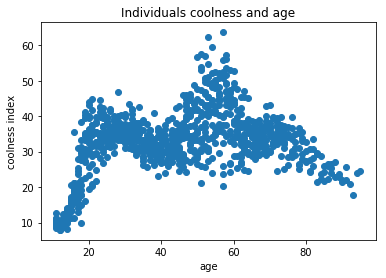

In [190]:
plt.scatter(data2['age'],data2['cool'])
plt.xlabel('age')
plt.ylabel('coolness index')
plt.title('Individuals coolness and age')

#### b

In [191]:
data2['age11']=((data2['age']>=11) & (data2['age']<22))
data2['age22']=((data2['age']>=22) & (data2['age']<40))
data2['age40']=((data2['age']>=40) & (data2['age']<59))
data2['age59']=((data2['age']>=59) & (data2['age']<77))
data2['age77']=((data2['age']>=77) & (data2['age']<=95))
data2['age11'][data2['age11']]=1
data2['age22'][data2['age22']]=1
data2['age40'][data2['age40']]=1
data2['age59'][data2['age59']]=1
data2['age77'][data2['age77']]=1

/Users/fulinguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/fulinguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/fulinguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/fulinguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:

In [192]:
import statsmodels.api as sm
reg1 = sm.OLS(endog=data2['cool'], exog=data2[['age11','age22','age40','age59','age77']])
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cool   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 27 Feb 2019   Prob (F-statistic):          3.73e-114
Time:                        01:05:23   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age11         20.1025      0.562     35.746      0.0

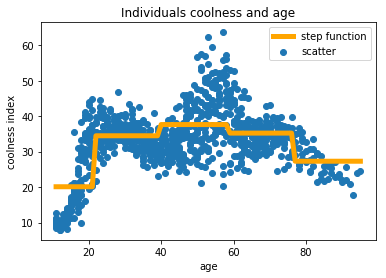

In [193]:
pre_cool=results.predict(exog=data2[['age11','age22','age40','age59','age77']])
plt.scatter(data2['age'],data2['cool'],label='scatter')
plt.plot(data2['age'],pre_cool,'orange', lw=5,label='step function')
plt.xlabel('age')
plt.ylabel('coolness index')
plt.title('Individuals coolness and age')
plt.legend()

In [194]:
print('The estimated step function values for each bin:')
print(results.params)

The estimated step function values for each bin:
age11    20.102457
age22    34.475788
age40    37.635105
age59    35.225400
age77    27.296378
dtype: float64


In [195]:
pre=results.predict(exog=[0, 0, 0, 1, 0])[0]
print('The predicted coolness of a 73-year old from the stepwise function is:',pre)

The predicted coolness of a 73-year old from the stepwise function is: 35.22540004024275


#### c

In [196]:
from scipy.interpolate import LSQUnivariateSpline

In [197]:
t=np.array([22,40,59,77])
age0=data2['age'][0]
incre_age=[age0]
incre_cool=[]
a=0
for i in range(1,len(data2['age'])):
    if data2['age'][i]!=age0:
        incre_age.append(data2['age'][i])
        incre_cool.append(sum(data2['cool'][a:i])/(i-a))
        a=i
    age0=data2['age'][i]
    if i==len(data2['age'])-1:
        incre_cool.append(sum(data2['cool'][a:i+1])/(i-a+1))
incre_age=np.array(incre_age)
incre_cool=np.array(incre_cool)
ans=LSQUnivariateSpline(incre_age, incre_cool, t,k=1)

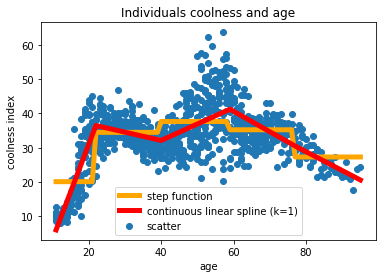

In [198]:
plt.scatter(data2['age'],data2['cool'],label='scatter')
plt.plot(data2['age'],pre_cool,'orange', lw=5, label='step function')
plt.plot(incre_age, ans(incre_age), 'r-', lw=5,label='continuous linear spline (k=1)')
plt.xlabel('age')
plt.ylabel('coolness index')
plt.title('Individuals coolness and age')
plt.legend()

In [199]:
pre2=ans(73)
print('The predicted coolness of a 73-year old from the stepwise function is:',pre2)

The predicted coolness of a 73-year old from the stepwise function is: 32.86784862349653


#### d

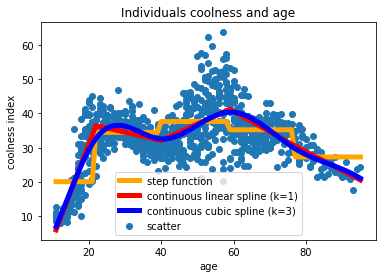

In [200]:
ans2=LSQUnivariateSpline(incre_age, incre_cool, t,k=3)
plt.scatter(data2['age'],data2['cool'],label='scatter')
plt.plot(data2['age'],pre_cool,'orange', lw=5, label='step function')
plt.plot(incre_age, ans(incre_age), 'r-', lw=5,label='continuous linear spline (k=1)')
plt.plot(incre_age, ans2(incre_age), 'b-', lw=5,label='continuous cubic spline (k=3)')
plt.xlabel('age')
plt.ylabel('coolness index')
plt.title('Individuals coolness and age')
plt.legend()

In [201]:
pre3=ans2(73)
print('The predicted coolness of a 73-year old from the stepwise function is:',pre3)

The predicted coolness of a 73-year old from the stepwise function is: 32.642301066279764
